<a href="https://colab.research.google.com/github/adefauziah/adenf/blob/master/ade_nurul_proyek_1_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving indonesian-names.csv to indonesian-names (1).csv
User uploaded file "indonesian-names.csv" with length 30462 bytes


In [ ]:
import io
df=pd.read_csv(io.StringIO(uploaded['indonesian-names.csv'].decode('utf-8')),sep=',')
df

,name,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


In [ ]:
df.gender[df.gender == 'm'] = 0
df.gender[df.gender == 'f'] = 1

In [ ]:
from sklearn.model_selection import train_test_split
kalimat = df['name'].values
y = df['gender'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
     
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
     
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
     
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=250, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid') #jumlah y kategori
                             ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
import numpy as np

In [ ]:
padded_latih=np.asarray(padded_latih).astype(np.int)
y_latih=np.asarray(y_latih).astype(np.int)
padded_test=np.asarray(padded_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

In [ ]:
num_epochs = 50
history = model.fit(padded_latih, y_latih, epochs=num_epochs,validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
49/49 - 0s - loss: 0.3547 - accuracy: 0.7653 - val_loss: 0.5484 - val_accuracy: 0.7500
Epoch 2/50
49/49 - 0s - loss: 0.3536 - accuracy: 0.7730 - val_loss: 0.5640 - val_accuracy: 0.7474
Epoch 3/50
49/49 - 0s - loss: 0.3529 - accuracy: 0.7736 - val_loss: 0.5710 - val_accuracy: 0.7449
Epoch 4/50
49/49 - 0s - loss: 0.3526 - accuracy: 0.7736 - val_loss: 0.5827 - val_accuracy: 0.7449
Epoch 5/50
49/49 - 0s - loss: 0.3532 - accuracy: 0.7736 - val_loss: 0.5853 - val_accuracy: 0.7449
Epoch 6/50
49/49 - 0s - loss: 0.3535 - accuracy: 0.7730 - val_loss: 0.5832 - val_accuracy: 0.7449
Epoch 7/50
49/49 - 0s - loss: 0.3533 - accuracy: 0.7742 - val_loss: 0.5813 - val_accuracy: 0.7474
Epoch 8/50
49/49 - 0s - loss: 0.3530 - accuracy: 0.7730 - val_loss: 0.6439 - val_accuracy: 0.7474
Epoch 9/50
49/49 - 0s - loss: 0.3555 - accuracy: 0.7736 - val_loss: 0.5204 - val_accuracy: 0.7398
Epoch 10/50
49/49 - 0s - loss: 0.3537 - accuracy: 0.7736 - val_loss: 0.5762 - val_accuracy: 0.7500
Epoch 11/50
49/49 -

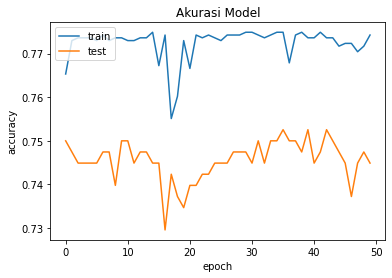

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

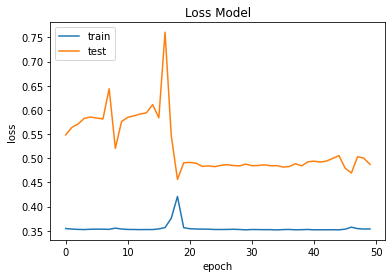

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()